In [1]:
import numpy 
import os
import ast
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

#from wquantiles import quantile
from openfisca_survey_manager.utils import asof

#from openfisca_france_indirect_taxation import FranceIndirectTaxationTaxBenefitSystem
#from openfisca_france_indirect_taxation.surveys import SurveyScenario
#from openfisca_france_indirect_taxation.calibration import get_inflators_by_year_energy
#from openfisca_france_indirect_taxation.almost_ideal_demand_system.utils import add_niveau_vie_decile

from openfisca_france_indirect_taxation.examples.utils_example import df_weighted_average_grouped
from openfisca_france_indirect_taxation.projects.Master_Thesis_Herve.Reform_carbon_tax_ext_margin import carbon_tax_rv_ext_margin
from openfisca_france_indirect_taxation.projects.Master_Thesis_Herve.Simulation_taxe_energie_winners_losers import (
    simulate_reformes_energie,
    run_all_elasticities)
from openfisca_france_indirect_taxation.projects.Master_Thesis_Herve.Graph_utils import (
    graph_CO2_emissions,
    graph_delta_CO2,
    graph_share_co2_emissions,
    graph_share_emissions_reduction,
    graph_ratio_emissions_reduction,
    graph_winners_losers,
    graph_net_transfers,
    graph_net_transfers_uc,
    graph_effort_rate,
    quantiles_for_boxplot,
    boxplot_effort_rate,
    boxplot_net_transfers,
    boxplot_net_transfers_uc
    )

In [2]:
data_path = "C:/Users/veve1/OneDrive/Documents/ENSAE 3A/Memoire MiE/Data"
output_path = "C:/Users/veve1/OneDrive/Documents/ENSAE 3A/Memoire MiE/Output"
sns.set_style("whitegrid")

In [3]:
df_elasticities = pd.read_csv(os.path.join(data_path,'Reform_parameters/Elasticities_literature.csv'), sep = ";")
df_elasticities = df_elasticities.astype({'ref_elasticity': str, 'elas_price_1_1': float , 'elas_price_2_2' : float ,'elas_price_3_3' : float })

# exemple
elasticites_douenne = df_elasticities[df_elasticities['ref_elasticity'] == 'Douenne (2020)'] 

In [4]:
to_graph_ext_margin, menages_reform_ext_margin, df_sum_ext_margin = run_all_elasticities(data_elasticities = df_elasticities, year = 2019, reform = carbon_tax_rv_ext_margin,bonus_cheques_uc=True)

In [4]:
menages_reform_ext_margin = pd.read_csv(os.path.join(output_path,'Data/menages_reform_carbon_tax_rv_ext_margin.csv'), index_col = 0)
to_graph_ext_margin = pd.read_csv(os.path.join(output_path,'Data/to_graph_reform_carbon_tax_rv_ext_margin.csv'), index_col = 0)
df_sum_ext_margin = pd.read_csv(os.path.join(output_path,'Data/df_sum_reform_carbon_tax_rv_ext_margin.csv'), index_col = 0)

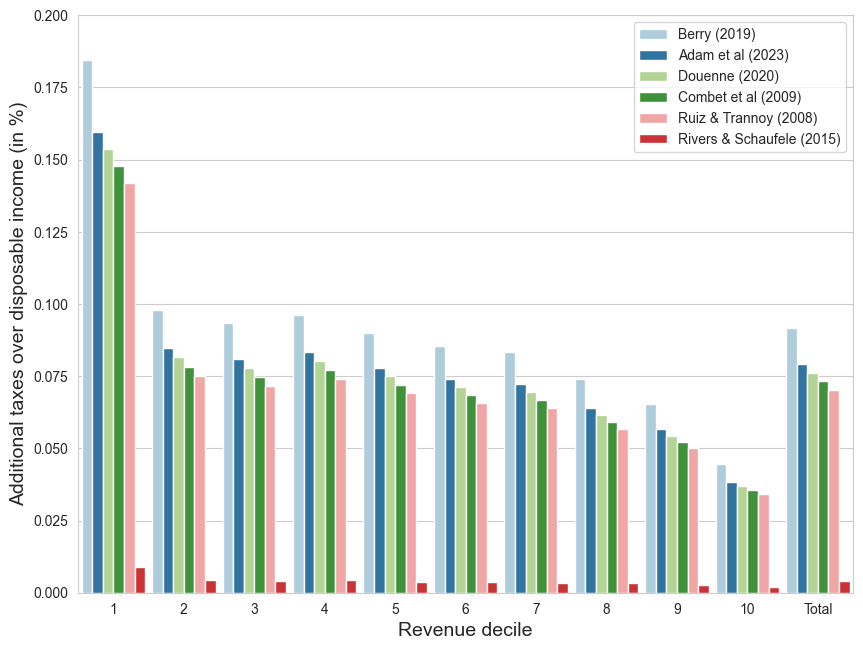

In [7]:
graph_effort_rate(to_graph_ext_margin,carbon_tax_rv_ext_margin,elas_vect = False,bonus_cheques_uc=True)

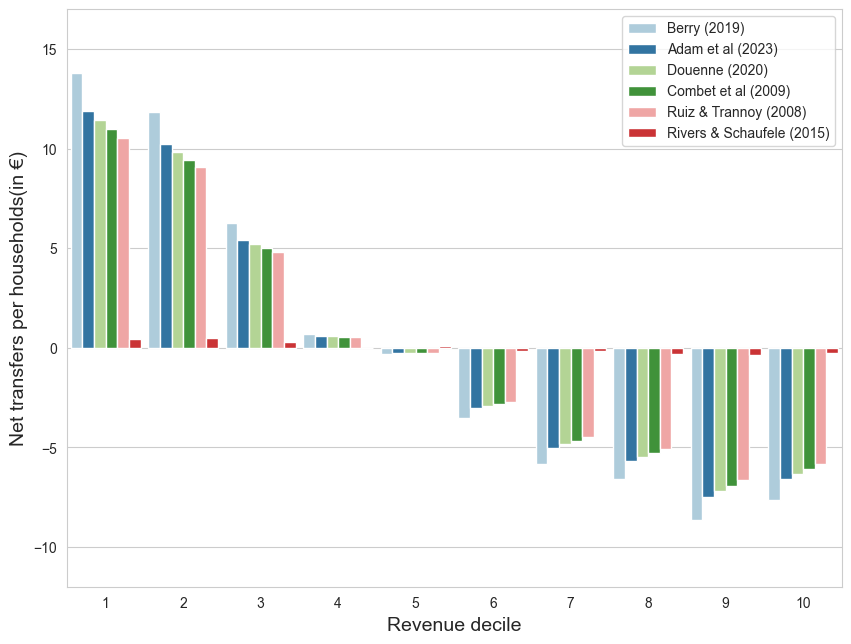

In [8]:
graph_net_transfers(to_graph_ext_margin,carbon_tax_rv_ext_margin,elas_vect = False,bonus_cheques_uc=True)

In [5]:
from openfisca_france_indirect_taxation.almost_ideal_demand_system.utils import add_niveau_vie_decile

ident_men = pd.HDFStore("C:/Users/veve1/OneDrive/Documents/ENSAE 3A/Memoire MiE/Data/data_collections/output/openfisca_indirect_taxation_data_2017.h5")['input'][['ident_men','pondmen', 'rev_disponible','ocde10','strate','poste_07_2_2_1_1']]
ident_men['ident_men'] = ident_men.ident_men.astype(numpy.int64)
ident_men = add_niveau_vie_decile(ident_men)

In [6]:
def add_depenses_carburants_quartile(dataframe):
    dataframe = dataframe.sort_values(by = ['poste_07_2_2_1_1'])
    dataframe['cum_pondmen'] = dataframe['pondmen'].cumsum()
    dataframe['rank'] = dataframe['cum_pondmen'] / dataframe['cum_pondmen'].max()
    dataframe['rank'] = dataframe['rank'].astype(float)
    dataframe['depenses_carburants_quartile'] = numpy.ceil(dataframe['rank'] * 4)
    dataframe.drop(['rank', 'cum_pondmen', 'poste_07_2_2_1_1'], axis = 1, inplace = True)
    return dataframe

In [9]:
ident_men = add_depenses_carburants_quartile(ident_men)

In [10]:
ident_men

,ident_men,pondmen,rev_disponible,ocde10,strate,niveau_vie_decile,depenses_carburants_quartile
9260,6409,4467.331955,0.0,1.0,3,1.0,1.0
1595,12029,4745.622174,52655.9,2.5,4,6.0,1.0
3747,14776,4188.36409,21058.5,1.0,3,6.0,1.0
7452,4142,2381.724429,31584.25,1.5,3,6.0,1.0
6370,2787,1395.836857,31583.75,1.5,0,6.0,1.0
...,...,...,...,...,...,...,...
209,10266,857.483975,54652.95,1.8,0,9.0,4.0
9123,6240,3180.13256,59151.75,2.0,2,9.0,4.0
6277,2670,3022.990296,24446.35,1.5,1,4.0,4.0
7555,4271,4885.312519,48080.7,2.0,1,7.0,4.0


In [12]:
ident_men['1er_quartile'] = ident_men['depenses_carburants_quartile'] == 1.0
ident_men['2e_quartile'] = ident_men['depenses_carburants_quartile'] == 2.0
ident_men['3e_quartile'] = ident_men['depenses_carburants_quartile'] == 3.0
ident_men['4e_quartile'] = ident_men['depenses_carburants_quartile'] == 4.0

In [22]:
share_expenditure_quartile = df_weighted_average_grouped(ident_men,'niveau_vie_decile',['1er_quartile', '2e_quartile', '3e_quartile', '4e_quartile']).reset_index()

In [27]:
to_graph_expenditure

,niveau_vie_decile,1er_quartile,2e_quartile,3e_quartile,4e_quartile
0,1.0,0.001566,0.501868,0.873912,1.0
1,2.0,0.000000,0.584202,0.844897,1.0
2,3.0,0.000000,0.297728,0.819462,1.0
3,4.0,0.406249,0.408610,0.773876,1.0
4,5.0,0.549786,0.550940,0.750407,1.0
5,6.0,0.546514,0.546514,0.725903,1.0
6,7.0,0.288948,0.510242,0.696839,1.0
7,8.0,0.000000,0.535009,0.706870,1.0
8,9.0,0.369906,0.521896,0.643346,1.0
9,10.0,0.336168,0.542568,0.664530,1.0


In [48]:
to_graph_expenditure = share_expenditure_quartile.copy()
to_graph_expenditure['niveau_vie_decile'] = to_graph_expenditure['niveau_vie_decile'].astype(int)
to_graph_expenditure['2e_quartile'] = to_graph_expenditure['1er_quartile'] + to_graph_expenditure['2e_quartile'] 
to_graph_expenditure['3e_quartile'] = to_graph_expenditure['2e_quartile'] + to_graph_expenditure['3e_quartile'] 
to_graph_expenditure['4e_quartile'] = to_graph_expenditure['3e_quartile'] + to_graph_expenditure['4e_quartile'] 

In [49]:
Baby_blue = (0.7019607843137254, 0.803921568627451, 0.8901960784313725)
Mint_green = (0.8, 0.9215686274509803, 0.7725490196078432)
Light_salmon = (0.984313725490196, 0.7058823529411765, 0.6823529411764706)
Lavender = (0.8705882352941177, 0.796078431372549, 0.8941176470588236)
Light_coral = (0.996078431372549, 0.8509803921568627, 0.6509803921568628)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


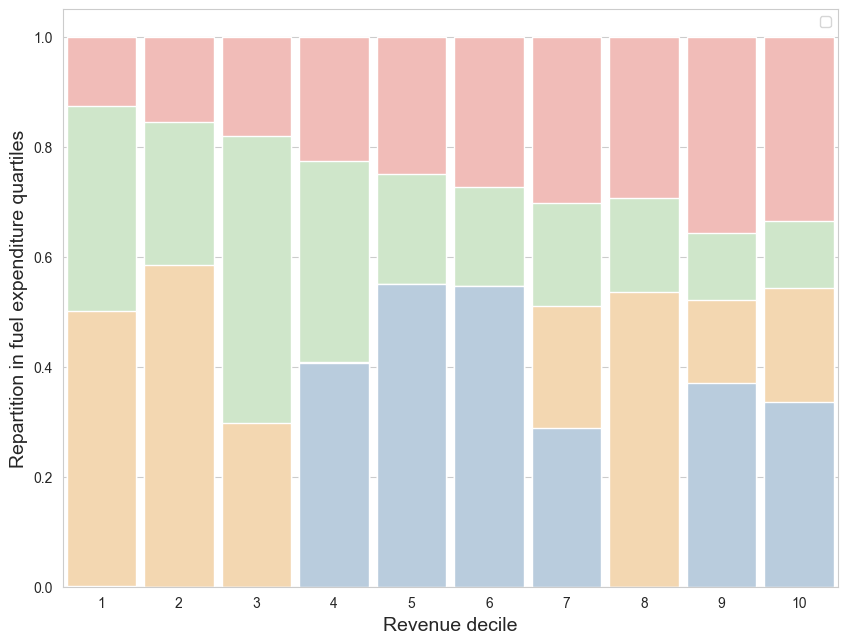

In [52]:
fig, ax = plt.subplots(figsize=(10, 7.5))
sns.barplot(x = 'niveau_vie_decile', y  = '4e_quartile', data = to_graph_expenditure , color = Light_salmon , width = .9)
sns.barplot(x = 'niveau_vie_decile', y  = '3e_quartile', data = to_graph_expenditure , color = Mint_green , width = .9)
sns.barplot(x = 'niveau_vie_decile', y  = '2e_quartile', data = to_graph_expenditure , color = Light_coral , width = .9)
sns.barplot(x = 'niveau_vie_decile', y  = '1er_quartile', data = to_graph_expenditure , color = Baby_blue , width = .9)

plt.xlabel('Revenue decile', fontdict = {'fontsize' : 14})
plt.ylabel('Repartition in fuel expenditure quartiles', fontdict = {'fontsize' : 14})
plt.legend()

In [50]:
to_graph_expenditure

,niveau_vie_decile,1er_quartile,2e_quartile,3e_quartile,4e_quartile
0,1,0.001566,0.501868,0.873912,1.0
1,2,0.000000,0.584202,0.844897,1.0
2,3,0.000000,0.297728,0.819462,1.0
3,4,0.406249,0.408610,0.773876,1.0
4,5,0.549786,0.550940,0.750407,1.0
5,6,0.546514,0.546514,0.725903,1.0
6,7,0.288948,0.510242,0.696839,1.0
7,8,0.000000,0.535009,0.706870,1.0
8,9,0.369906,0.521896,0.643346,1.0
9,10,0.336168,0.542568,0.664530,1.0
